# Basic Statistics on the Warp Routes
This notebook provides basic statistics on the Warp routes. We will investigate first-level statistics such as the number of unique assets and routes.

In [7]:
import pandas as pd

# Load the CSV file (make sure the path is correct if your file is elsewhere)
# df = pd.read_csv("data/bquxjob_6d1f9d31_19685a5680f.csv")
df = pd.read_csv("data/bq-results-20250430-073657-1745998667647.csv")
# Convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

df

,route_id,origin,destination,amount,asset,time
0,celestia/arbitrum-neutron,neutron,arbitrum,19.000000,celestia,2025-04-30 05:53:41+00:00
1,celestia/arbitrum-neutron,neutron,arbitrum,11.700000,celestia,2025-04-30 05:45:04+00:00
2,ethereum/arbitrum-base,arbitrum,base,0.007000,ethereum,2025-04-30 05:50:18+00:00
3,hyperlane/arbitrum-base,arbitrum,base,1376.137940,hyperlane,2025-04-30 05:52:09+00:00
4,hyperlane/arbitrum-bsc,arbitrum,bsc,45.156000,hyperlane,2025-04-30 05:03:15+00:00
...,...,...,...,...,...,...
6056854,ethereum/bob-zetachain,bob,zetachain,0.148500,ethereum,2024-07-30 22:48:37+00:00
6056855,ethereum/bob-zetachain,bob,zetachain,0.498895,ethereum,2024-07-30 08:56:49+00:00
6056856,ethereum/bob-zetachain,bob,zetachain,0.050000,ethereum,2024-07-29 10:11:53+00:00
6056857,ethereum/bob-zetachain,bob,zetachain,0.089315,ethereum,2024-07-25 12:12:27+00:00


In [45]:
# Number of unique assets
num_assets = df['asset'].nunique()

# Number of unique routes
num_routes = df['route_id'].nunique()

# Number of messages sent
total_messages = len(df)

print(f"Number of unique assets: {num_assets}")
print(f"Number of unique routes: {num_routes}")
print(f"Total warp transfers sent: {total_messages}")

Number of unique assets: 57
Number of unique routes: 547
Total warp transfers sent: 6056859


## Warp Route Usage

In [8]:
# Count the number of messages per route
messages_per_route = df['route_id'].value_counts()
messages_per_route

route_id
injective-protocol/inevm-injective        1086463
celestia/arbitrum-neutron                 1064601
celestia/mantapacific-neutron              369020
celestia/forma-stride                      338985
solana/eclipsemainnet-solanamainnet        261601
                                           ...   
ethereum/blast-scroll                           1
openusdt/ink-mode                               1
renzo-restaked-eth/ethereum-worldchain          1
usd-coin/bsc-polygon                            1
ethereum/blast-ethereum                         1
Name: count, Length: 547, dtype: int64

In [9]:
assets_transferred = df['asset'].value_counts()
assets_transferred

asset
celestia                         1813870
ethereum                         1683161
injective-protocol               1086463
renzo-restaked-eth                613265
solana                            292330
usd-coin                          245116
hyperlane                          98362
magic                              79820
openusdt                           32889
tether                             25230
eclipse-fi                         22888
official-trump                     20345
dogwifcoin                          6938
orca                                4753
kyros-restaked-sol                  4340
aixbt-by-virtuals                   3568
artela-network                      3101
stride-staked-tia                   2996
bonk                                1830
polygon-ecosystem-token             1766
game-by-virtuals                    1498
sonic-svm                           1318
renzo-restaked-sol                  1292
cod3x                               1272
elixir-deu

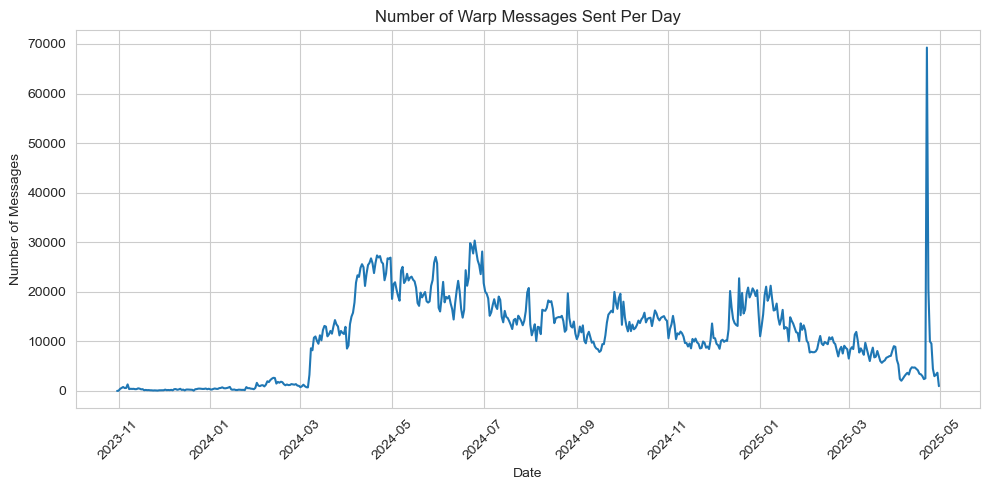

In [13]:
from matplotlib import pyplot as plt

# Extract the date only (no time)
df['date'] = df['time'].dt.date

# Count number of messages per day
messages_per_day = df.groupby('date').size()

# Plotting the messages per day as a line chart
plt.figure(figsize=(10, 5))
messages_per_day.plot(kind='line')
plt.title('Number of Warp Messages Sent Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

Text(147.31597222222223, 0.5, 'Day of Week')

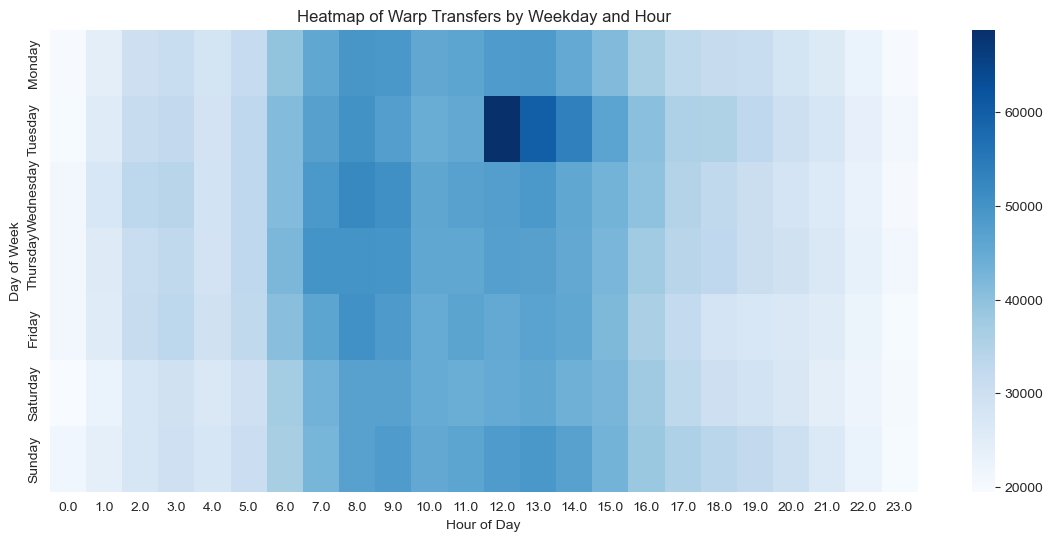

In [16]:
import seaborn as sns

# Extract weekday and hour from the time column
df['weekday'] = df['time'].dt.day_name()
df['hour'] = df['time'].dt.hour

# Create a pivot table with weekdays as rows and hours as columns
heatmap_data = df.pivot_table(index='weekday', columns='hour', values='route_id', aggfunc='count', fill_value=0)

# Reorder weekdays to start from Monday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

# Plotting the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="Blues", fmt='d')
plt.title('Heatmap of Warp Transfers by Weekday and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

## Asset Analysis

/var/folders/gb/r3pt61qd18qczfr_d6rx8gpc0000gn/T/ipykernel_26138/2404449203.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


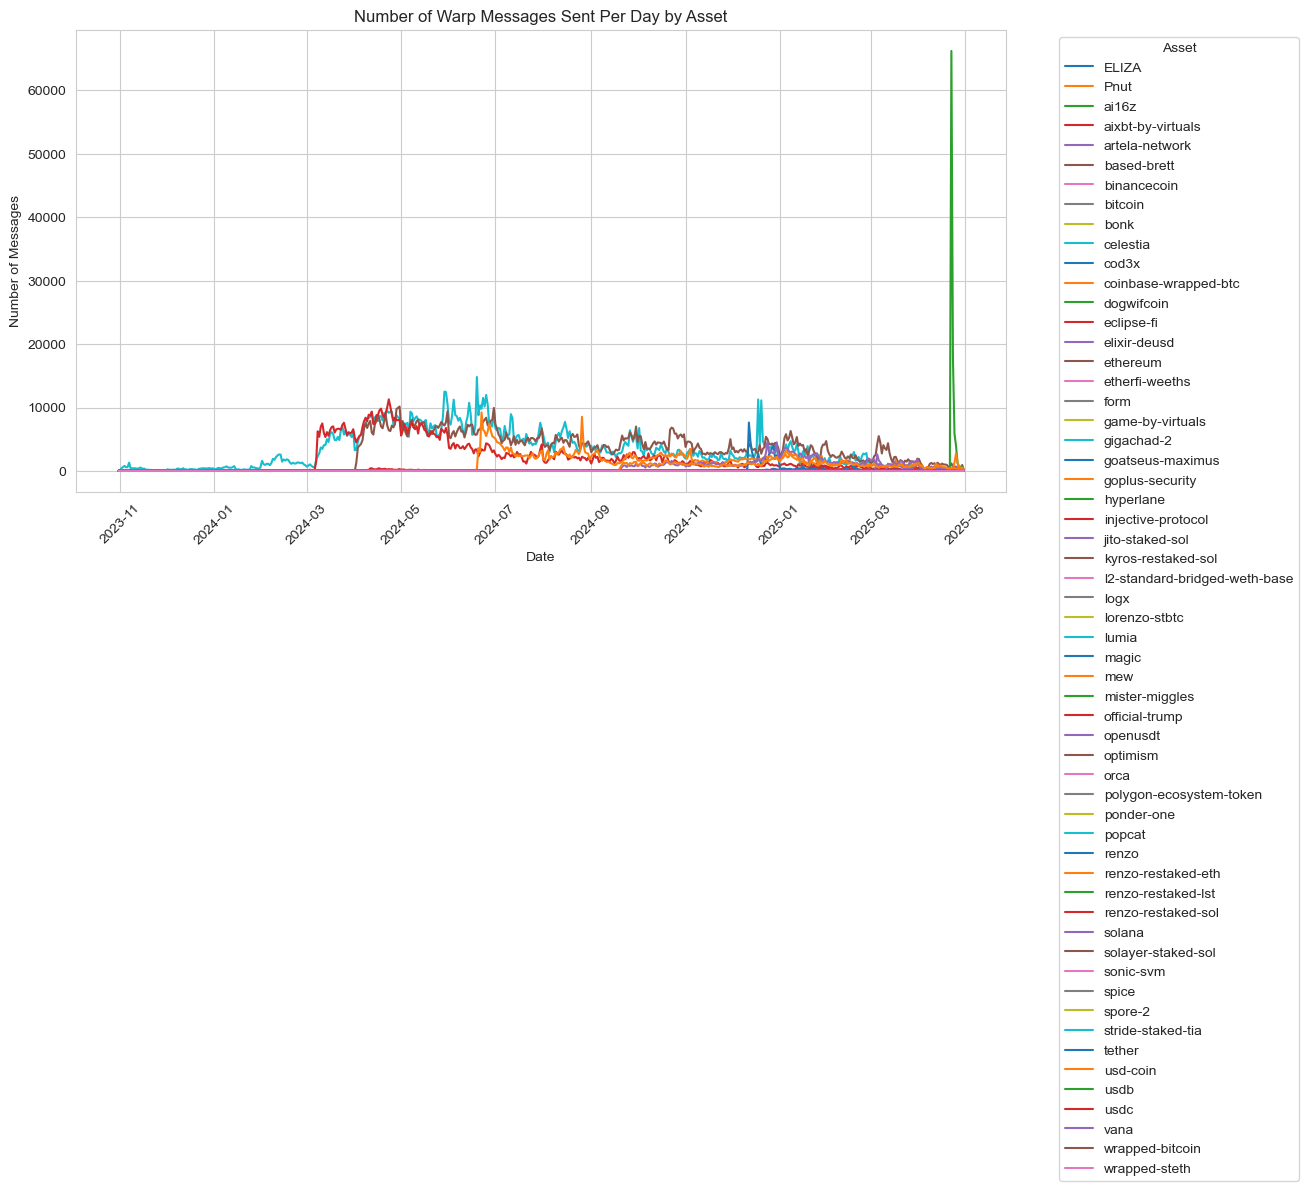

In [17]:
from matplotlib import pyplot as plt

assets_per_day = df.groupby(['date', 'asset']).size().unstack(fill_value=0)
assets_per_day.plot(kind='line', figsize=(12, 6))
plt.title('Number of Warp Messages Sent Per Day by Asset')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Asset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

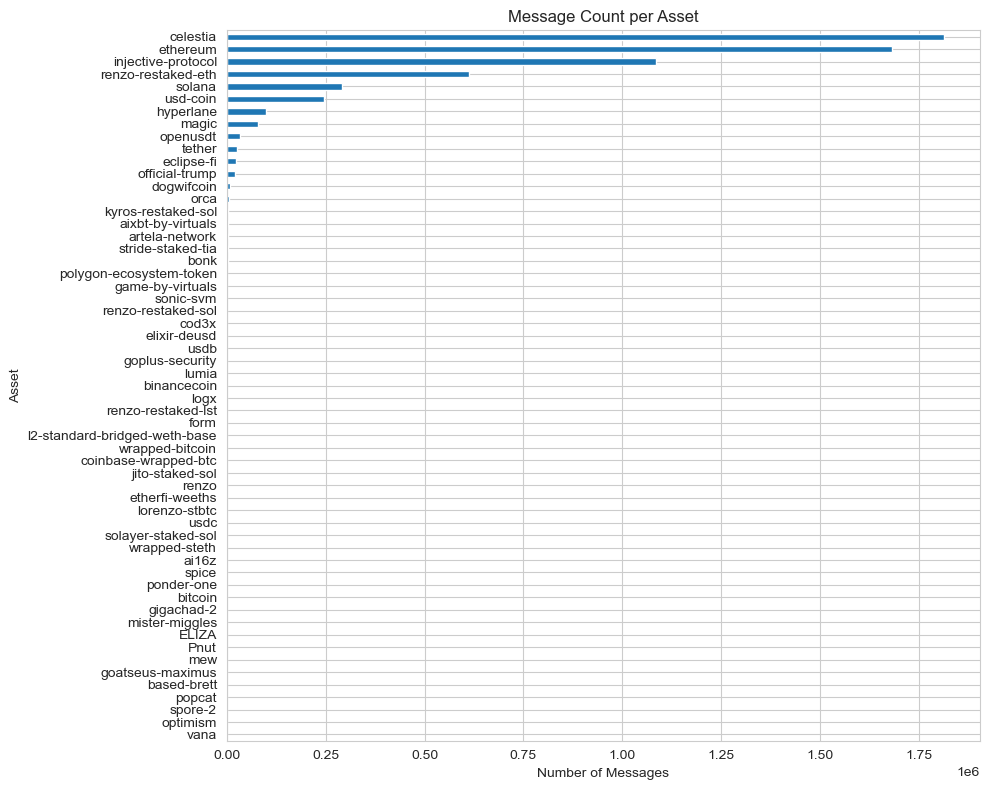

In [60]:
# Clean asset names
df['asset'] = df['asset'].str.strip()
asset_counts = df['asset'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
asset_counts.plot(kind='barh')
plt.title('Message Count per Asset')
plt.xlabel('Number of Messages')
plt.ylabel('Asset')
plt.gca().invert_yaxis()  # Highest count at the top
plt.tight_layout()
plt.show()

## Origin and Destination Analysis

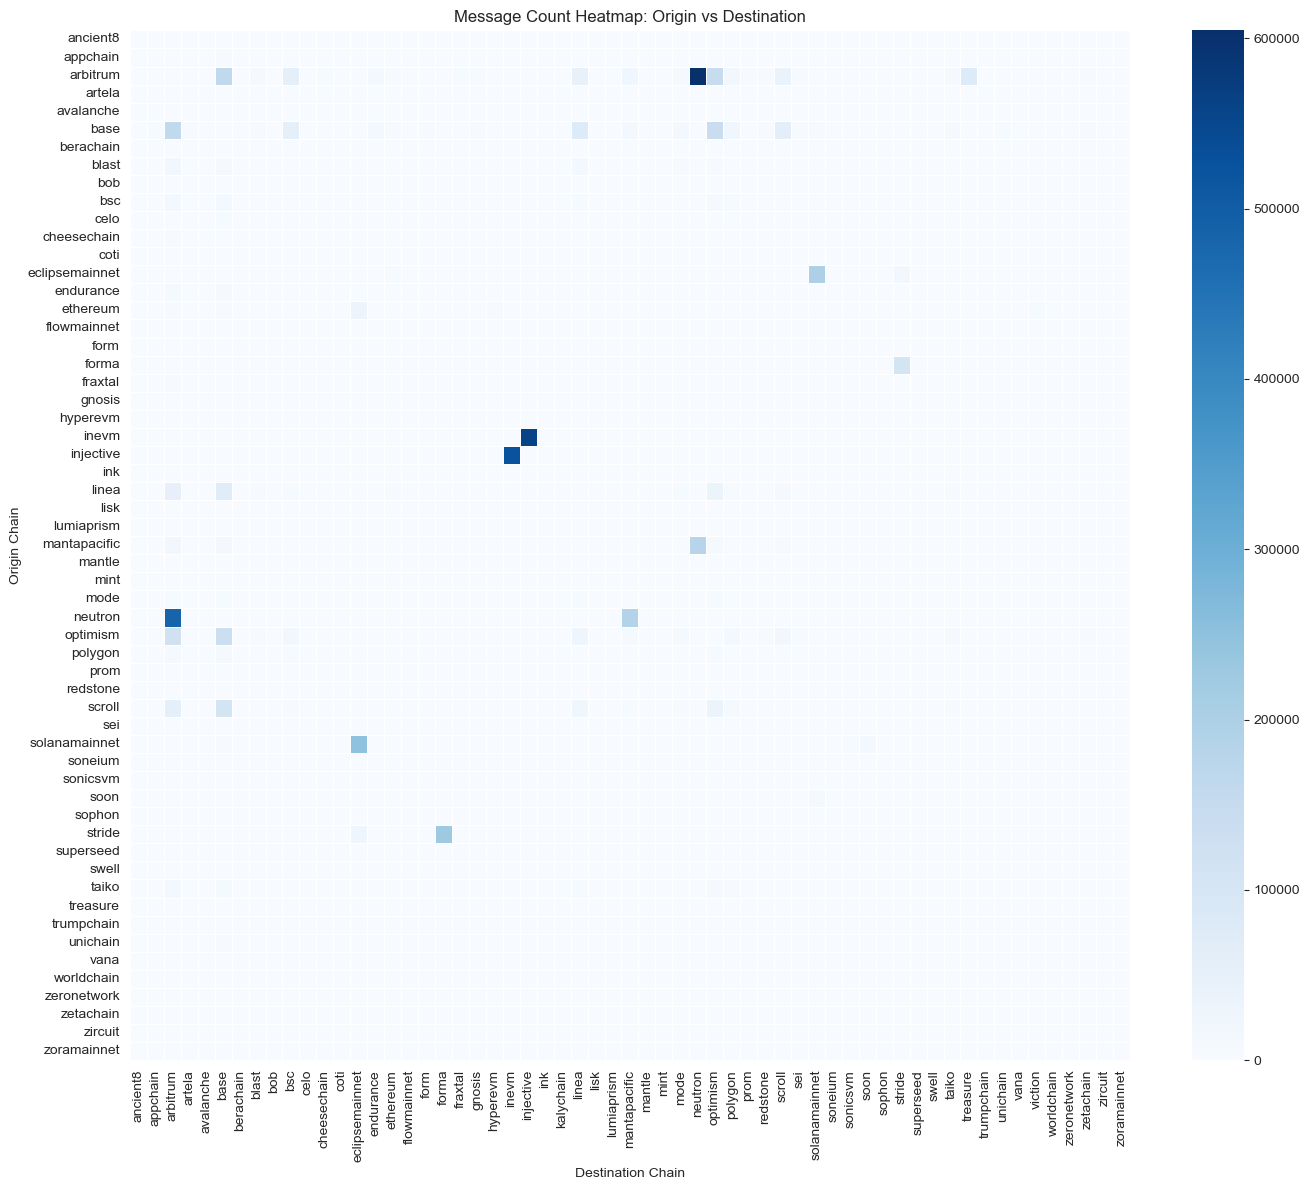

In [77]:
# If each row is a message, group by origin/destination
heatmap_data = df.groupby(['origin', 'destination']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data, fmt='d', cmap='Blues', linewidths=.5)

plt.title('Message Count Heatmap: Origin vs Destination')
plt.xlabel('Destination Chain')
plt.ylabel('Origin Chain')
plt.tight_layout()
plt.show()

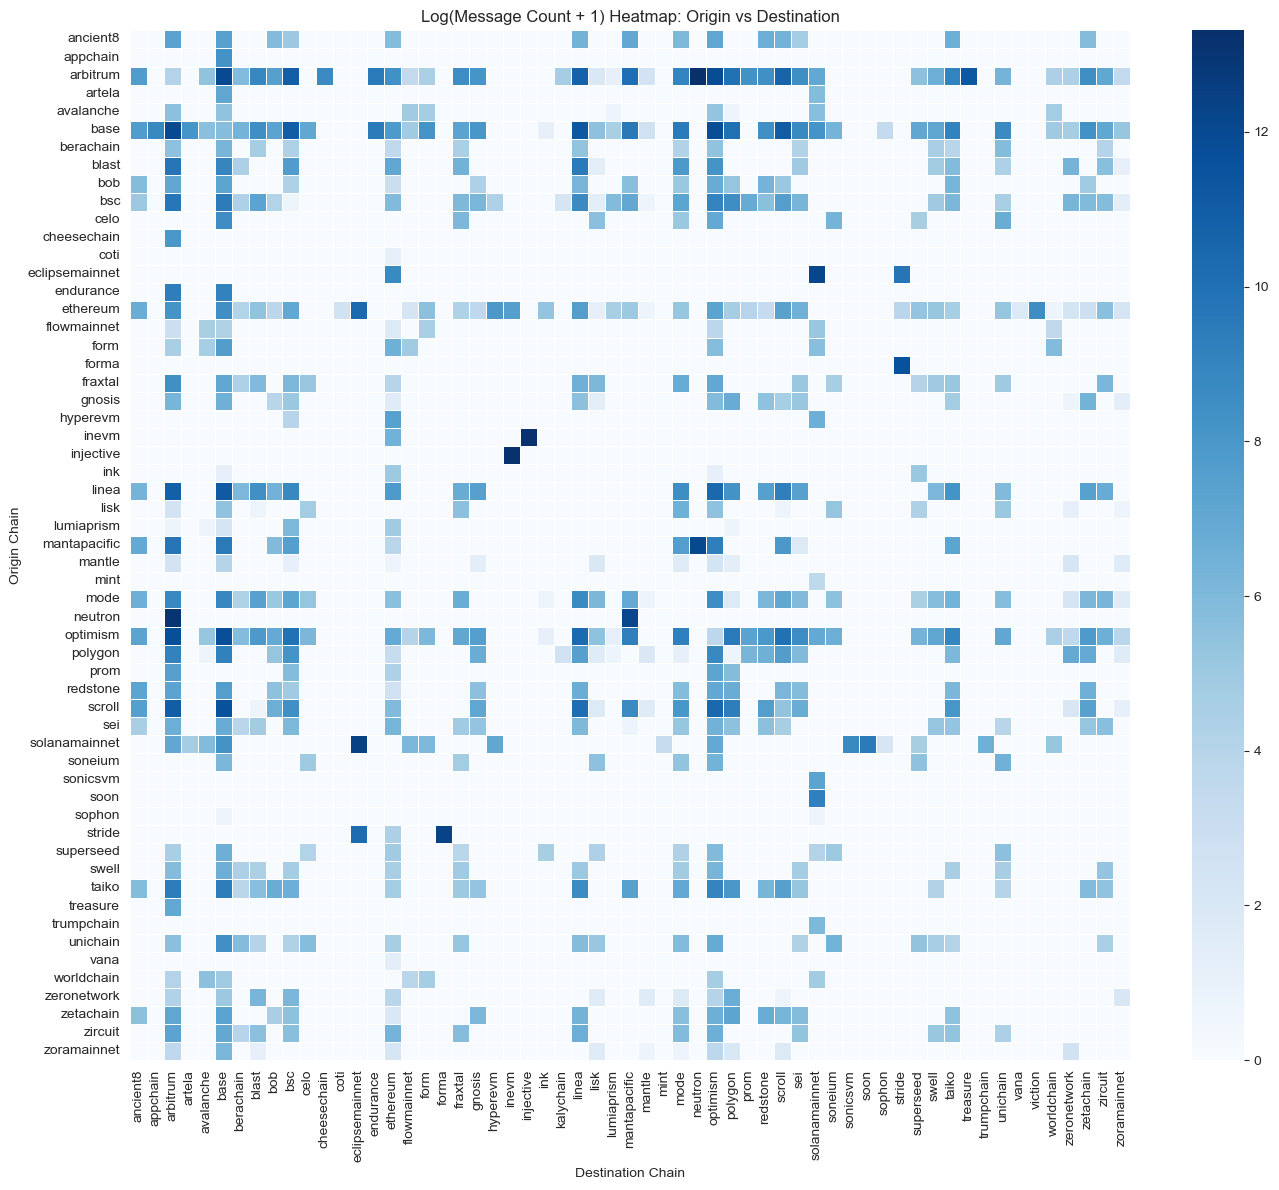

In [80]:
import numpy as np
# Apply log transformation — add 1 to avoid log(0)
log_heatmap_data = np.log1p(heatmap_data)

# Plot
plt.figure(figsize=(14, 12))
sns.heatmap(log_heatmap_data, fmt=".1f", cmap='Blues', linewidths=.5)

plt.title('Log(Message Count + 1) Heatmap: Origin vs Destination')
plt.xlabel('Destination Chain')
plt.ylabel('Origin Chain')
plt.tight_layout()

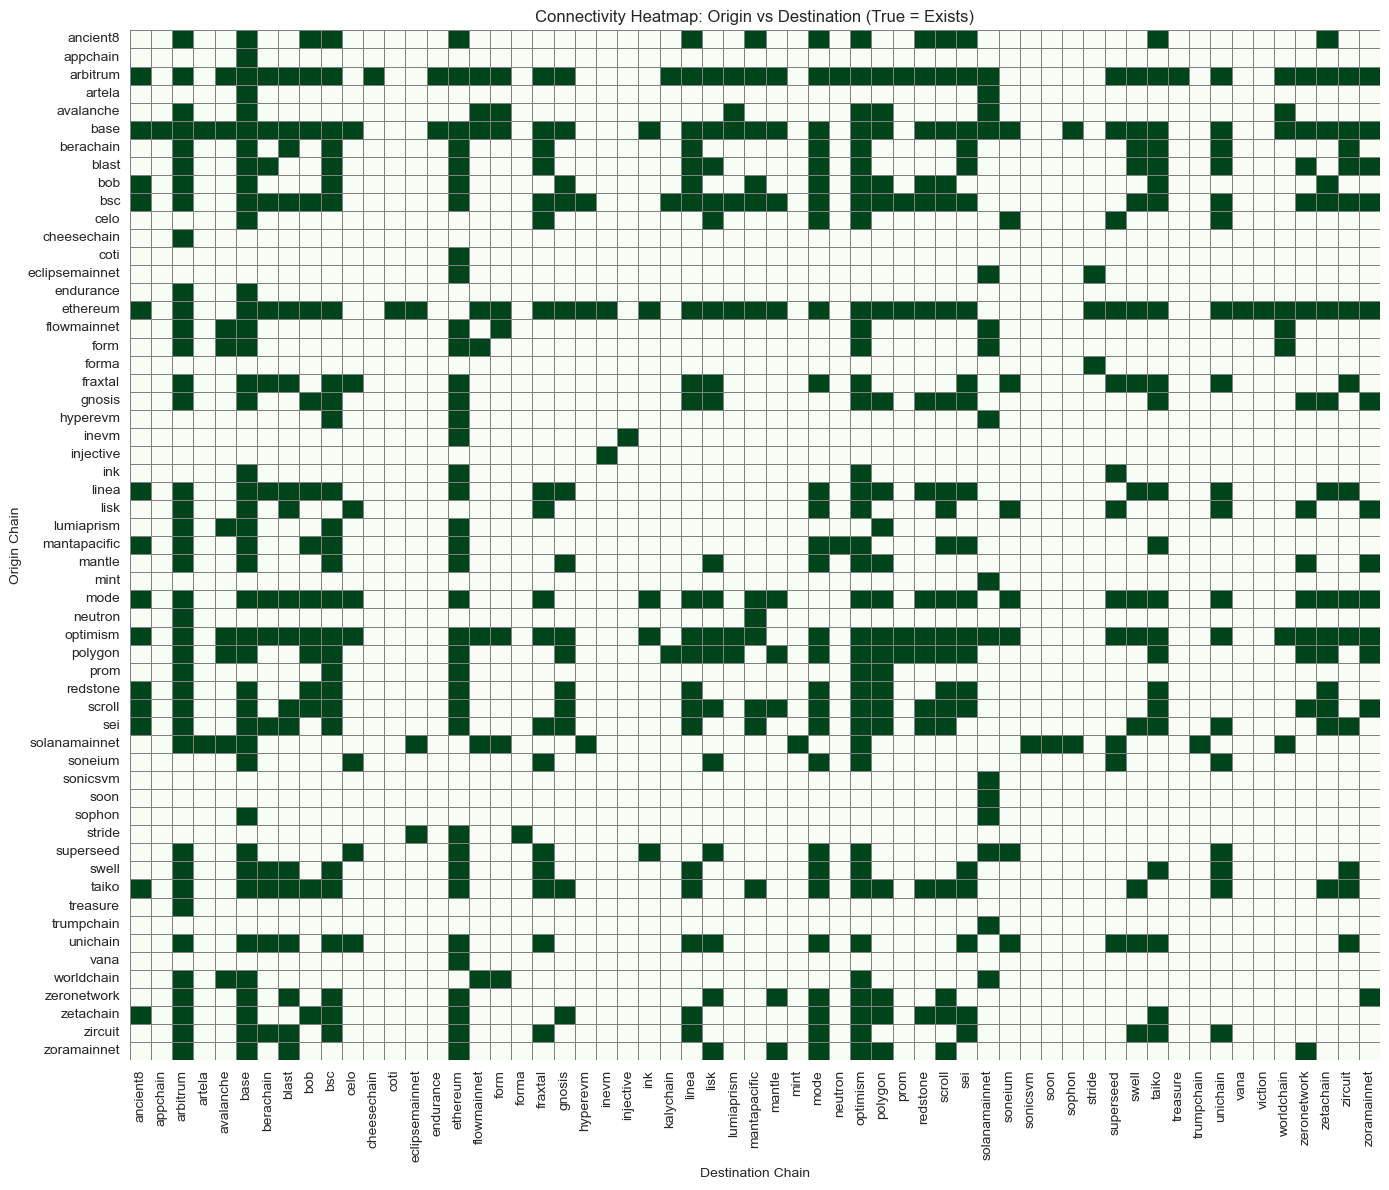

In [83]:
connectivity = heatmap_data > 0  # Convert counts to True/False

# Plot
plt.figure(figsize=(14, 12))
sns.heatmap(connectivity, cmap='Greens', linewidths=.5, linecolor='grey', cbar=False)

plt.title('Connectivity Heatmap: Origin vs Destination (True = Exists)')
plt.xlabel('Destination Chain')
plt.ylabel('Origin Chain')
plt.tight_layout()

# Route Analysis

## Survival Analysis

In [94]:
# Convert date column to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Group by route and get first and last message dates
route_lifespans = df.groupby('route_id').agg(
    first_seen=('date', 'min'),
    last_seen=('date', 'max')
).reset_index()

# Add duration in days
route_lifespans['duration_days'] = (route_lifespans['last_seen'] - route_lifespans['first_seen']).dt.days

# Add "event_occurred" flag: True if no message in last 30 days
cutoff = df['date'].max() - pd.Timedelta(days=30)
route_lifespans['inactive'] = route_lifespans['last_seen'] < cutoff
route_lifespans

,route_id,first_seen,last_seen,duration_days,inactive
0,ELIZA/solanamainnet-soon,2025-03-27,2025-04-10,14,False
1,Pnut/solanamainnet-soon,2025-03-27,2025-04-10,14,False
2,ai16z/solanamainnet-soon,2025-03-28,2025-04-25,28,False
3,aixbt-by-virtuals/base-form,2025-01-09,2025-04-29,110,False
4,artela-network/artela-base,2025-01-15,2025-04-29,104,False
...,...,...,...,...,...
542,wrapped-bitcoin/ethereum-hyperevm,2025-02-19,2025-04-27,67,False
543,wrapped-bitcoin/mode-scroll,2024-11-07,2024-11-07,0,True
544,wrapped-bitcoin/mode-zeronetwork,2024-11-07,2024-11-07,0,True
545,wrapped-bitcoin/scroll-zeronetwork,2024-11-07,2024-11-07,0,True


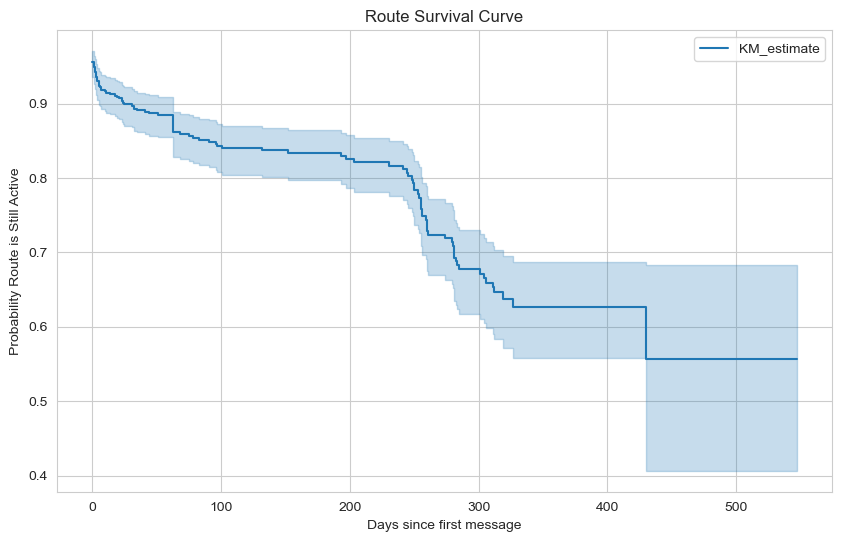

In [114]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(durations=route_lifespans['duration_days'], event_observed=route_lifespans['inactive'])
# Plot the survival curve
plt.figure(figsize=(10, 6))
kmf.plot()
plt.title('Route Survival Curve')
plt.xlabel('Days since first message')
plt.ylabel('Probability Route is Still Active')
plt.grid(True)
plt.show()


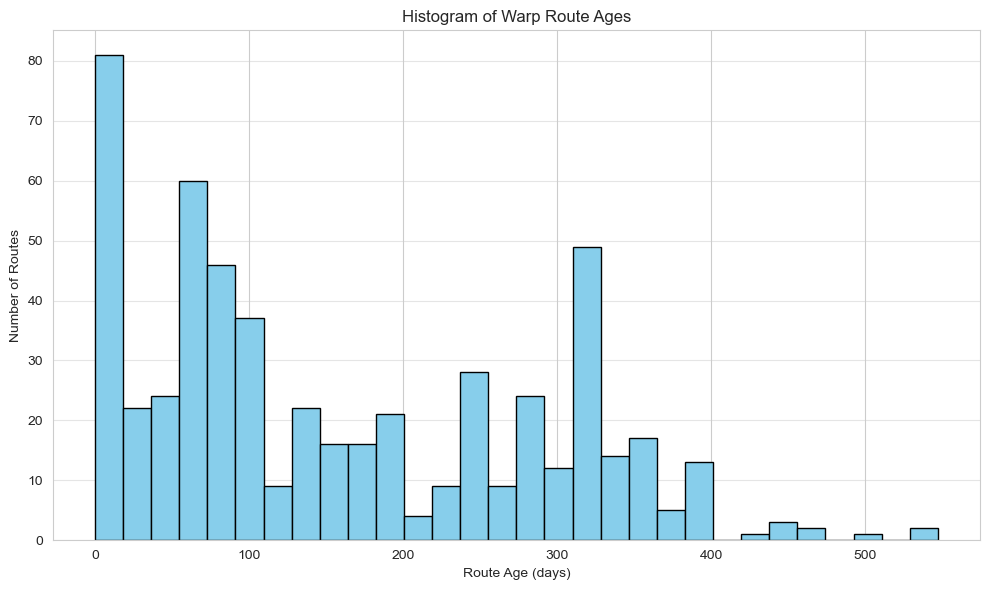

In [121]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(route_lifespans['duration_days'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Warp Route Ages')
plt.xlabel('Route Age (days)')
plt.ylabel('Number of Routes')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

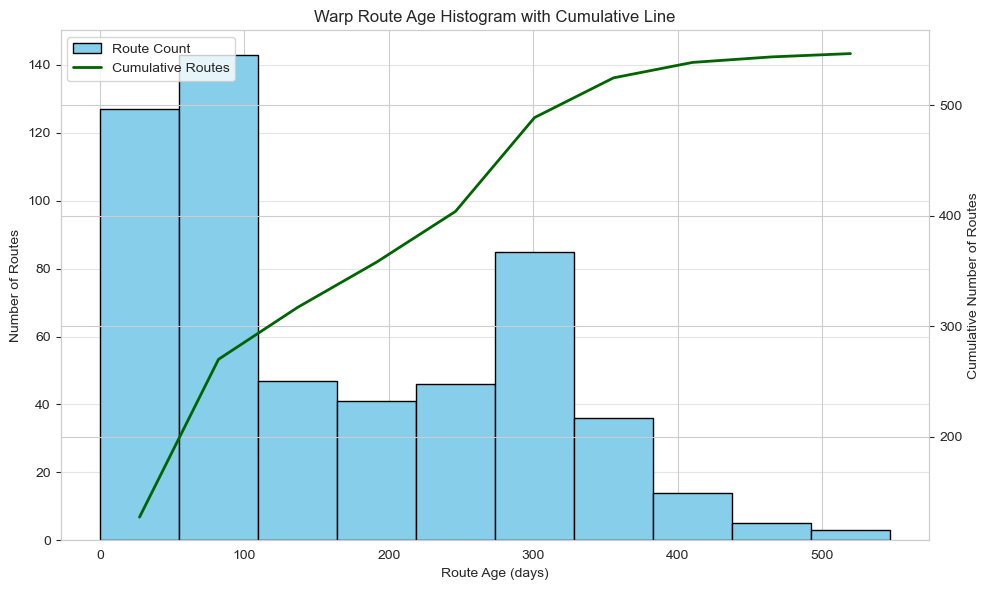

In [119]:
# Prepare age data
ages = route_lifespans['duration_days']
counts, bins = np.histogram(ages, bins=10)

# Compute bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

# Cumulative sum
cumulative = np.cumsum(counts)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Histogram
ax1.bar(bin_centers, counts, width=np.diff(bins), align='center', color='skyblue', edgecolor='black', label='Route Count')
ax1.set_xlabel('Route Age (days)')
ax1.set_ylabel('Number of Routes')
ax1.grid(axis='y', alpha=0.5)

# Secondary y-axis for cumulative
ax2 = ax1.twinx()
ax2.plot(bin_centers, cumulative, color='darkgreen', linewidth=2, label='Cumulative Routes')
ax2.set_ylabel('Cumulative Number of Routes')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Warp Route Age Histogram with Cumulative Line')
plt.tight_layout()
plt.show()


In [124]:
# STEP 1: Get first and last active day per route
route_activity_span = df.groupby('route_id')['date'].agg(['min', 'max']).reset_index()
route_activity_span['days_active'] = (route_activity_span['max'] - route_activity_span['min']).dt.days

# STEP 2: Build full index with all valid (route, days_since_first_message)
full_index = pd.concat([
    pd.DataFrame({
        'route_id': [row['route_id']] * (row['days_active'] + 1),
        'days_since_first_message': list(range(row['days_active'] + 1))
    })
    for _, row in route_activity_span.iterrows()
], ignore_index=True)

# STEP 3: Create actual cohort stats from main df
df['cohort'] = df.groupby('route_id')['date'].transform('min')
df['days_since_first_message'] = (df['date'] - df['cohort']).dt.days
cohort_stats = df.groupby(['route_id', 'days_since_first_message']).size().reset_index(name='messages_sent')

# STEP 4: Merge full index with actual data and fill missing days with 0
cohort_complete = pd.merge(full_index, cohort_stats, on=['route_id', 'days_since_first_message'], how='left')
cohort_complete['messages_sent'] = cohort_complete['messages_sent'].fillna(0).astype(int)
cohort_complete

,route_id,days_since_first_message,messages_sent
0,ELIZA/solanamainnet-soon,0,2
1,ELIZA/solanamainnet-soon,1,0
2,ELIZA/solanamainnet-soon,2,0
3,ELIZA/solanamainnet-soon,3,0
4,ELIZA/solanamainnet-soon,4,0
...,...,...,...
87066,wrapped-steth/ethereum-form,106,1
87067,wrapped-steth/ethereum-form,107,0
87068,wrapped-steth/ethereum-form,108,0
87069,wrapped-steth/ethereum-form,109,0


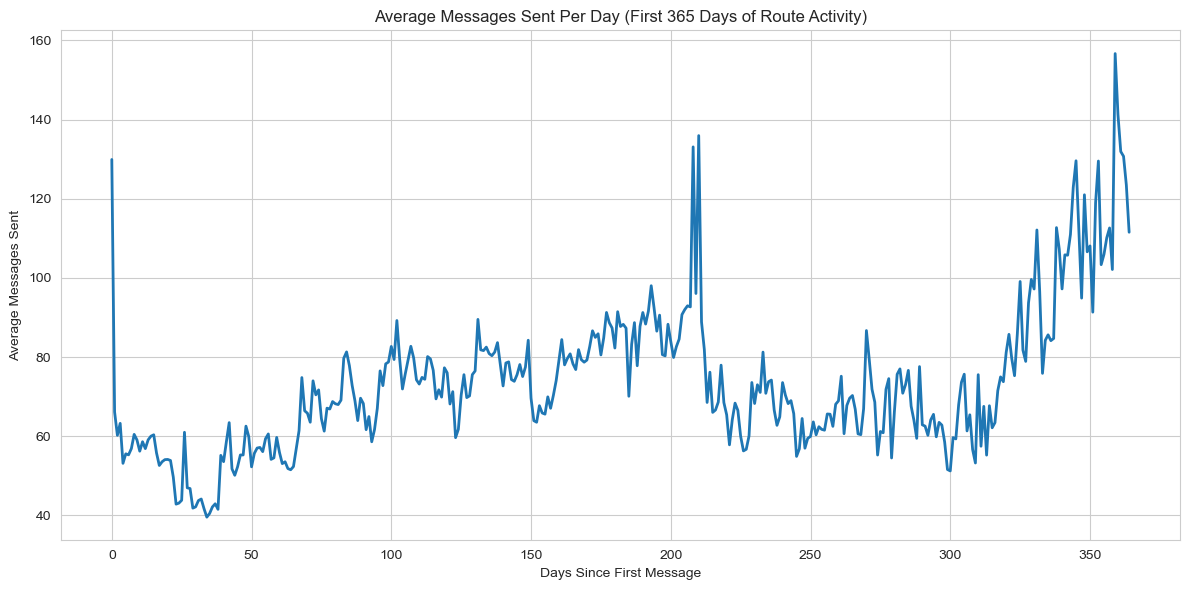

In [125]:
# Filter only the first 365 days per route
filtered = cohort_complete[cohort_complete['days_since_first_message'] <= 364]

# Compute average per day across all routes
average_messages_per_day = (
    filtered.groupby('days_since_first_message')['messages_sent']
    .mean()
    .reset_index(name='average_messages_sent')
)

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(average_messages_per_day['days_since_first_message'], average_messages_per_day['average_messages_sent'], linewidth=2)

plt.title('Average Messages Sent Per Day (First 365 Days of Route Activity)')
plt.xlabel('Days Since First Message')
plt.ylabel('Average Messages Sent')
plt.grid(True)
plt.tight_layout()

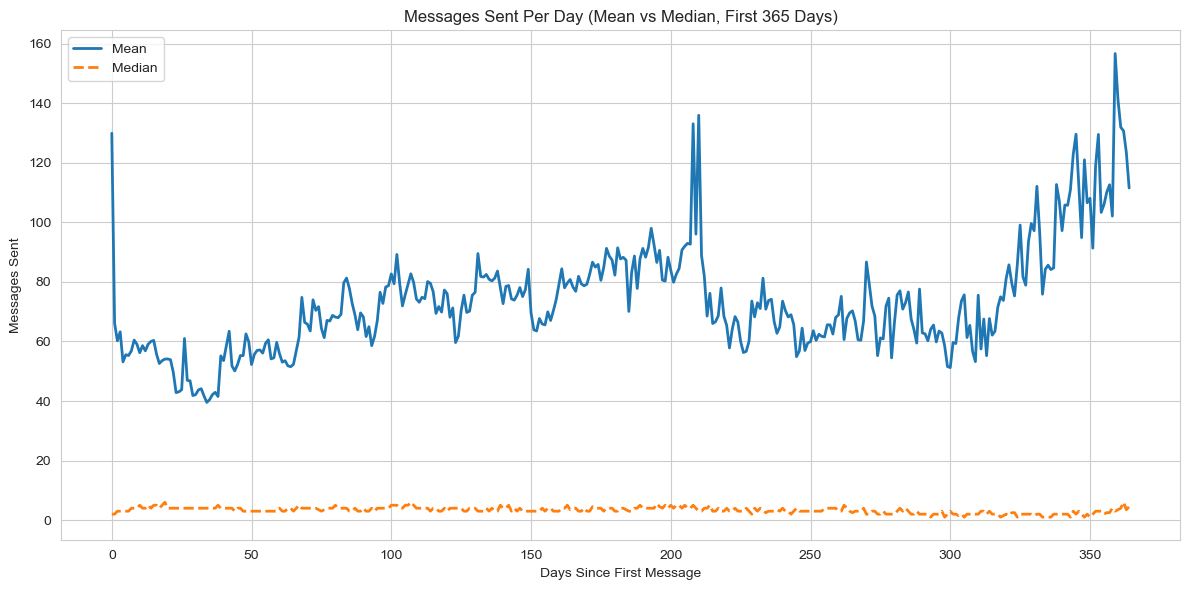

In [126]:
# Compute both mean and median per day
per_day_stats = (
    cohort_complete[cohort_complete['days_since_first_message'] <= 364]
    .groupby('days_since_first_message')['messages_sent']
    .agg(average='mean', median='median')
    .reset_index()
)

plt.figure(figsize=(12, 6))
plt.plot(per_day_stats['days_since_first_message'], per_day_stats['average'], label='Mean', linewidth=2)
plt.plot(per_day_stats['days_since_first_message'], per_day_stats['median'], label='Median', linewidth=2, linestyle='--')

plt.title('Messages Sent Per Day (Mean vs Median, First 365 Days)')
plt.xlabel('Days Since First Message')
plt.ylabel('Messages Sent')
plt.legend()
plt.grid(True)
plt.tight_layout()